<a href="https://colab.research.google.com/github/YunJinHeo/Machine-learning-Deep-learning-to-study-alone/blob/main/CH9_Artificial_Neural_Networks_for_texts/CH9_Artificial_Neural_Networks_for_texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09-1 순차 데이터와 순환 신경망

## 순차 데이터

**순차 데이터(sequential data)**는 텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터를 말한다.

 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 능력이 필요하다.

 이전에 다루었던 합성곱 신경망, 완전 연결 신경망은 이전 데이터를 기억하지 않고 입력 데이터의 흐름이 앞으로만 전달되는데 이러한 신경망을 **피드포워드 신경망(feedforward neural network, FFNN)**이라고 한다.

## 순환 신경망

 **순환 신경망(recurrent neural network, RNN)**은 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리를 추가시켜준 형태로 샘플을 처리할 때 이전 데이터를 참조하게 된다.

  순환 신경망에서는 이전 샘플에 대한 기억을 갖게되는데 이렇게 샘플을 처리하는 한 단계를 **타임 스텝(timestep)**이라고 한다.

  순환 신경망에서는 층을 **셀(cell)**이라고 부른다. 또, 셀의 출력을 **은닉 상태(hidden state)**라고 부른다.

  일반적으로 순환 신경망의 은닉 층에서는 활성화 함수로 하이퍼볼릭 탄젠트 함수인 **tanh**가 많이 사용된다. 시그모이드 함수와 모양이 비슷하지만 시그모이드 함수와 달리 범위가 -1 ~ 1 이다.(시그모이드 함수의 범위는 0 ~ 1 이다.)

## 셀의 가중치와 입출력

 타임스텝의 은닉상태는 셀의 모든 뉴런에 전달된다. 즉, 이전 타임스텝의 은닉상태는 다음 타임스텝의 뉴런에 완전히 연결된다.

 * 입력층의 뉴런이 4개이고 순환층의 뉴런이 3개인 경우의 가중치와 파라미터의 개수
  
  가중치 : $ 4*3(입력층과 순환층의 연결) + 3 * 3(은닉상태가 다음 타임스텝에 전달될 때 가중치) = 21$

  파라미터 : $21(가중치) + 3(절편) = 24$

 * 순환 신경망의 차원

샘플의 차원 : [ 샘플의 개수, 샘플의 길이(단어의 수), 단어 표현(저장 공간) ]

출력의 차원 : [ 샘플의 개수, 뉴런의 개수 ]

 출력의 차원을 보면 알 수 있듯이 순환층은 모든 타임 스텝의 은닉 상태를 출력으로 내놓는 것이 아니라 마지막 타임 스텝의 은닉 상태만 출력으로 내보내어 샘플 당 뉴런의 개수 만큼의 출력을 만들어 낸다.

 순환 신경망을 여러 층 쌓는 경우에는 중간에 있는 층이 마지막 타임 스텝의 은닉 상태만 출력으로 내놓으면 다음 층이 입력을 받을 수 없으므로, 마지막 층을 제외한 층에서는 모든 은닉 상태를 출력으로 내놓는다.

 순환 신경망도 합성곱 신경망과 마찬가지로 마지막에는 밀집층(소프트 맥스 함수)을 두어 클래스를 분류한다. 차이점은 샘플마다 셀이 1차원 배열을 출력하기 때문에 Flatten 클래스로 출력값을 펼칠 필요 없이 바로 출력층에 연결할 수 있다는 점이다.

# 09-2 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

**자연어 처리(natural language processing, NLP)**는 컴퓨터를 사용해 인간의 언어를 처리하는 분야를 일컫는다. 세부 분야로는 음성 인식, 기계 번역, 감성 분석등이 있다.

 자연어 처리에서 훈련 데이터를 종종 **말뭉치(corpus)**라고 부른다.

 텍스트 데이터의 경우 일반적으로 단어마다 고유한 정수를 부여하며, 분리된 단어를 **토큰(token)**이라고 부른다. 하나의 샘플은 여러개의 토큰으로 구성되며 각 토큰이 하나의 타임스텝에 대응된다.

 토큰에 할당하는 정수 중에 몇개는 특정한 용도로 예약되어 있는 경우가 있다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.(훈련 세트에서 고유한 단어를 뽑아 만든 목록을 어휘 사전이라고 부른다.)


In [ ]:
from tensorflow.keras.datasets import imdb # IMDB 데이터셋에는 문장을 정수로 바꾼 데이터가 저장되어 있다.
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200) # num_words 매개변수를 200으로 설정해 가장 자주 등장하는 단어 200개만 사용

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape) # train_input에는 샘플이 파이썬 배열로 저장되어 있기 때문에 넘파이 배열 상 1차원으로 보인다.

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(len(train_input[1])) # 각 샘플의 토큰 개수가 다르다.

189


In [ ]:
print(train_input[0]) # 지정한 200개의 단어 이외의 단어는 2로 표시되어 나타난다.

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20]) # 타깃 값이 0(부정)과 1(긍정)으로 구분되어 있다.

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42) # 25000개의 샘플을 20000개의 훈련 세트와 5000개의 검증 세트로 분류

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input]) # 리뷰의 길이의 분포를 확인하기 위해 넘파이 배열로 저장

In [ ]:
print(np.mean(lengths), np.median(lengths)) # 평균값이 중간값보다 크므로 데이터 셋의 길이가 한 쪽으로 치우쳐져 있음을 예상해 볼 수 있다.

239.00925 178.0


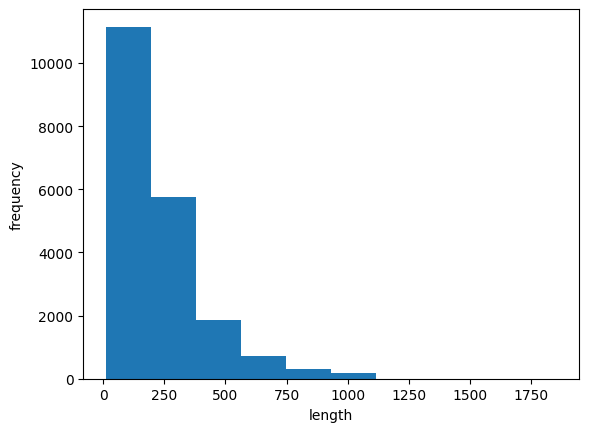

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # 시퀀스 데이터의 길이를 맞추기 위해서 pad_sequences() 함수를 사용할 수 있다.
train_seq = pad_sequences(train_input, maxlen=100) # maxlen을 설정하여 리뷰의 길이를 100으로 맞추고 길이가 100이 되지 않는 경우에는 토큰 0을 사용하여 패딩한다.

In [ ]:
print(train_seq.shape) # 파이썬 리스트의 배열이 길이가 100인 2차원 배열로 바뀌었다.

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [ ]:
print(train_input[0][-10:]) # 샘플의 길이가 100보다 긴 경우 샘플의 앞부분이 짤렸음을 확인할 수 있다. pad_sequences() 함수의 truncating 매개변수의 값을 기본 값 pre가 아닌 post로 바꾸면 샘플의 뒷부분을 짜를 수 있다.

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [ ]:
print(train_seq[5]) # 패딩 토큰은 시퀀스의 앞부분에 추가되었다. pad_sequences() 함수의 padding 매개변수의 값을 기본 값 pre가 아닌 post로 바꾸면 샘플의 뒷부분에 패딩 토큰을 추가할 수 있다.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,200)))
'''
문자열 데이터는 정수로 저장되어 있으므로 데이터를 그대로 입력 값으로 사용하면 토큰 별 가중치가 달라지게 된다.
이를 해결하기 위해서 원-핫 인코딩 방식을 사용하며, 앞서 총 200개의 단어만 사용하도록 지정해 놨기 때문에 input_shape를 (100,200)으로 입력했다.
활성화 함수의 기본 값은 'tanh'이다.
'''
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq) # to_categorical() 함수는 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환해 준다.

In [ ]:
print(train_seq.shape)
print(train_oh.shape) # 100개의 토큰 각각에 대해 200개의 원-핫 인코딩 배열을 생성하므로 train_oh가 (20000, 100, 200) 크기로 바뀌었다.

(20000, 100)
(20000, 100, 200)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0])) # 원-핫 인코딩이 잘 된 것을 확인할 수 있다.

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary() # 순환층의 모델 파라미터 수 : 200*8 + 8*8 + 8 = 1672

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 8)                   │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

## 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4986 - loss: 0.7024 - val_accuracy: 0.5024 - val_loss: 0.6992
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5105 - loss: 0.6980 - val_accuracy: 0.5276 - val_loss: 0.6924
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5376 - loss: 0.6893 - val_accuracy: 0.5576 - val_loss: 0.6866
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5680 - loss: 0.6826 - val_accuracy: 0.5752 - val_loss: 0.6811
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5884 - loss: 0.6752 - val_accuracy: 0.5884 - val_loss: 0.6763
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5936 - loss: 0.6727 - val_accuracy: 0.5998 - val_loss: 0.6718
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6096 - loss: 0.6673 - val_accuracy: 0.6090 - val_loss: 0.6671
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6271 - loss: 0.6601 -

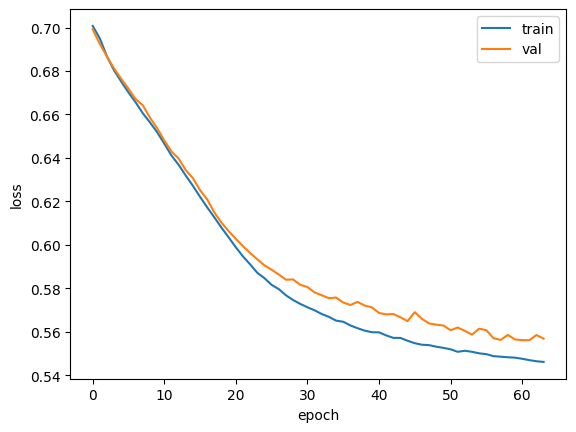

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes) # 원-핫 인코딩을 이용하면 데이터 셋의 크기가 엄청 커진다는 단점이 있다.

8000000 3200000000


## 단어 임베딩을 사용하기

 순환 신경망에서 텍스트를 처리할 때는 주로 **단어 임베딩(word embedding)**을 사용한다.

 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다. 원-핫 인코딩된 벡터보다 훨씬 의미있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다.

 케라스 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공한다.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(200, 16, input_shape=(100,))) # 첫 번째 매개변수는 어휘 사전의 크기를 두 번째 매개변수는 임베딩 벡터의 크기를 나타낸다.
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.summary()
# embedding 층은 200개의 토큰을 각각 크기가 16인 벡터로 변경하기 때문에 200*16 =3200개의 파라미터를 필요로 한다.
# SimpleRNN 층은 16*8 + 8*8 + 8 = 200 개의 파라미터를 갖는다.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5158 - loss: 0.6925 - val_accuracy: 0.5076 - val_loss: 0.6943
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5285 - loss: 0.6899 - val_accuracy: 0.5118 - val_loss: 0.6930
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5491 - loss: 0.6859 - val_accuracy: 0.5174 - val_loss: 0.6927
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5540 - loss: 0.6842 - val_accuracy: 0.5236 - val_loss: 0.6911
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5613 - loss: 0.6820 - val_accuracy: 0.5250 - val_loss: 0.6914
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5693 - loss: 0.6792 - val_accuracy: 0.5202 - val_loss: 0.6921
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5707 - loss: 0.6795 - val_accuracy: 0.5358 - val_loss: 0.6892
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5772 - loss: 0.6757 -

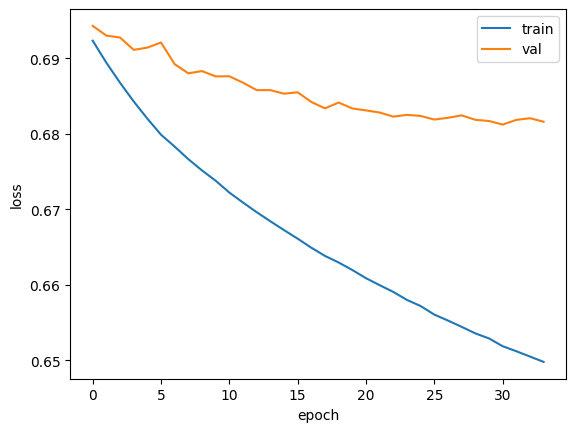

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 09-3 LSTM과 GRU 셀

 기본 순환층은 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문에 긴 시퀀스를 학습하기 어렵다. 이를 위해 LSTM과 GRU 셀이 발명되었다.

## LSTM 구조

 LSTM은 Long Shot-Term Memory의 약자로 단기 기억을 오래 기억하기 위해 고안되었다.

  기본 순환층과 달리 활성화 함수로 시그모이드 함수를 사용한다. 여기에 tanh 함수를 통과한 셀 상태 값과 곱해져서 은닉 상태를 만든다.

 LSTM에는 은닉 상태 이외에 **셀 상태(cell state)**라고 부르는 값이 순환된다. 셀 상태는 다음 층으로 전달되지 않고 LSTM 셀 내에서만 순환 되는 값으로 LSTM은 3개의 셀이 존재한다.

 * 셀 상태 계산 과정

 1) 입력과 은닉 상태를 또 다른 가중치($w_0$)에 곱한 다음 1번 셀을 만든 뒤 시그모이드 함수를 통과시킨다.

 2) 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만든다. **(삭제 게이트)**

 3) 입력과 은닉 상태를 또 다른 가중치($w_i, w_j$)와 곱해 2개의 작은 셀(각각 2번, 3번 셀)을 만든다.

 4) 2번 셀은 시그모이드 함수를 3번 셀은 tanh 함수를 통과시킨 뒤 두 결과를 곱한다.

 5) 이전 타임스텝의 셀 상태에 더하여 새로운 셀 상태를 만든다. **(입력 게이트)**

 6) 셀 상태는 tanh 함수를 통과하여 새로운 은닉 상태를 만드는데 기여한다. **(출력 게이트)**





## LSTM 신경망 훈련하기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, 100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary() # SimpleRNN의 파라미터 수는 16*8 + 8*8 + 8 = 200 이었다. LSTM은 셀 4개를 사용하므로 정확히 4배의 파라미터 개수를 갖는다.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5104 - loss: 0.6929 - val_accuracy: 0.5668 - val_loss: 0.6916
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5752 - loss: 0.6913 - val_accuracy: 0.6108 - val_loss: 0.6891
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6157 - loss: 0.6879 - val_accuracy: 0.6434 - val_loss: 0.6824
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6590 - loss: 0.6780 - val_accuracy: 0.6860 - val_loss: 0.6583
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6959 - loss: 0.6398 - val_accuracy: 0.7198 - val_loss: 0.5866
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7232 - loss: 0.5788 - val_accuracy: 0.7306 - val_loss: 0.5684
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7477 - loss: 0.5500 - val_accuracy: 0.7524 - val_loss: 0.5434
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7544 - loss: 0.5355 - val_

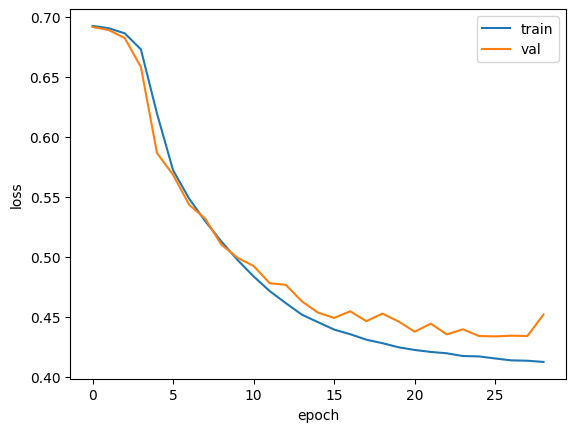

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 순환층에 드롭아웃 적용하기

순환층은 자체적으로 드롭아웃 기능을 제공한다.

SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있다.

dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용한다. 기술적인 문제로인해 recurrent_droput을 사용하면 GPU를 사용할 수 없다.



In [ ]:
from tensorflow import keras
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5123 - loss: 0.6928 - val_accuracy: 0.5772 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5755 - loss: 0.6905 - val_accuracy: 0.6126 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6145 - loss: 0.6853 - val_accuracy: 0.6180 - val_loss: 0.6743
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6374 - loss: 0.6601 - val_accuracy: 0.7042 - val_loss: 0.6208
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7164 - loss: 0.6046 - val_accuracy: 0.7222 - val_loss: 0.5930
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7302 - loss: 0.5823 - val_accuracy: 0.7382 - val_loss: 0.5729
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7528 - loss: 0.5569 - val_accuracy: 0.7486 - val_loss: 0.5473
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7605 - loss: 0.5349 - v

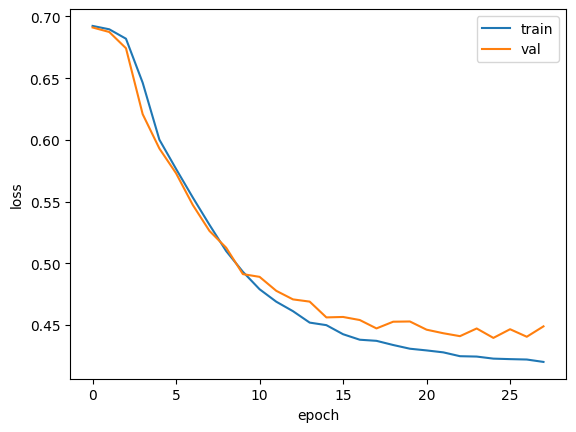

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 2개의 층을 연결하기

  순환층을 연결하기 위해서는 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 한다. 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다.

  케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정하면 된다.

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 8)              │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,897 (38.66 KB)

 Trainable params: 9,897 (38.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5066 - loss: 0.6931 - val_accuracy: 0.5282 - val_loss: 0.6930
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5176 - loss: 0.6929 - val_accuracy: 0.5400 - val_loss: 0.6926
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5447 - loss: 0.6920 - val_accuracy: 0.5772 - val_loss: 0.6890
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5891 - loss: 0.6821 - val_accuracy: 0.6532 - val_loss: 0.6416
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6659 - loss: 0.6294 - val_accuracy: 0.6966 - val_loss: 0.6018
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7018 - loss: 0.5915 - val_accuracy: 0.7130 - val_loss: 0.5747
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7337 - loss: 0.5555 - val_accuracy: 0.7074 - val_loss: 0.5821
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7373 - loss: 0.540

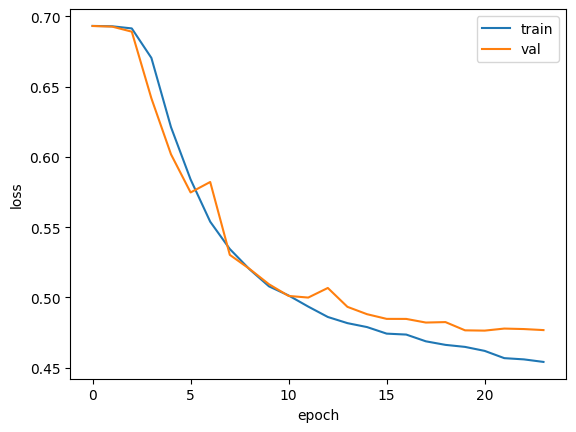

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## GRU 구조

GRU는 Gated Recurrent Unit의 약자이다. LSTM처럼 셀 사태를 계산하지 않고 은닉 상태를 포함하고 있으며 LSTM을 간소화한 버전으로 생각할 수 있다.

GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않는 좋은 성능을 내는 것으로 알려져 있다.

## GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model4.summary()
# GRU는 3개의 셀을 지니고 있기 때문에 (16*8 + 8*8 + 8)*3 = 600
# 각 셀에 절편이 별도로 필요하여 8*3 = 24 가 추가로 더해진다.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5067 - loss: 0.6930 - val_accuracy: 0.5228 - val_loss: 0.6925
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5459 - loss: 0.6916 - val_accuracy: 0.5500 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5746 - loss: 0.6895 - val_accuracy: 0.5702 - val_loss: 0.6881
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5993 - loss: 0.6862 - val_accuracy: 0.5896 - val_loss: 0.6837
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6054 - loss: 0.6814 - val_accuracy: 0.6042 - val_loss: 0.6767
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6210 - loss: 0.6726 - val_accuracy: 0.6156 - val_loss: 0.6662
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6435 - loss: 0.6591 - val_accuracy: 0.6322 - val_loss: 0.6491
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6560 - loss: 0.6394 - val

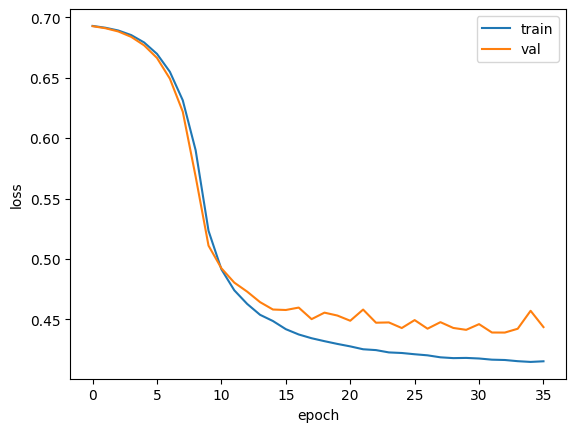

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-gru-model.keras')
rnn_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7998 - loss: 0.4352


[0.43515250086784363, 0.7988799810409546]